# Analiza dostarczonych danych
## Michał Hetmańczuk

In [1]:
import pandas as pd

## Załadowanie i transformacja dostarczonych danych

In [2]:
orders = pd.read_csv('zamowienia.csv', sep=';')
prices = pd.read_csv('cena bazowa.csv', sep=';')
sent = pd.read_csv('wyslane.csv', sep=';')

In [3]:
orders

,order_id,client_id,order_date,KUPON
0,1462414,523933015,29.06.2019,NaN
1,1538139,814107372,15.08.2019,NaN
2,1838871,713139458,19.08.2019,NaN
3,1896544,123641536,05.05.2019,15%
4,1943852,602252913,30.07.2019,NaN
...,...,...,...,...
5018,997711725,4117165,06.05.2019,9%
5019,998024676,305628656,20.08.2019,NaN
5020,998261938,718872103,24.06.2019,NaN
5021,998648795,685690262,05.04.2019,NaN


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    5023 non-null   int64 
 1   client_id   5023 non-null   int64 
 2   order_date  5023 non-null   object
 3   KUPON       998 non-null    object
dtypes: int64(2), object(2)
memory usage: 157.1+ KB


In [5]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['KUPON'] = orders['KUPON'].str.rstrip('%').astype('float') / 100.0

In [6]:
print(orders['order_date'].min())
print(orders['order_date'].max())

2019-01-04 00:00:00
2019-12-08 00:00:00


In [7]:
print(orders.describe())
print(orders.info())
print(orders.head())

           order_id     client_id       KUPON
count  5.023000e+03  5.023000e+03  998.000000
mean   4.904020e+08  4.992673e+08    0.274890
std    2.873466e+08  2.868305e+08    0.135102
min    1.462414e+06  1.078930e+05    0.050000
25%    2.407280e+08  2.561680e+08    0.160000
50%    4.835475e+08  4.973075e+08    0.270000
75%    7.373715e+08  7.419003e+08    0.390000
max    9.989347e+08  9.996900e+08    0.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    5023 non-null   int64         
 1   client_id   5023 non-null   int64         
 2   order_date  5023 non-null   datetime64[ns]
 3   KUPON       998 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 157.1 KB
None
   order_id  client_id order_date  KUPON
0   1462414  523933015 2019-06-29    NaN
1   1538139  814107372 2019-08-15 

### W jakim dniu roku klienci złożyli najwięcej zamówień?

order_date
2019-08-14    41
Name: order_id, dtype: int64


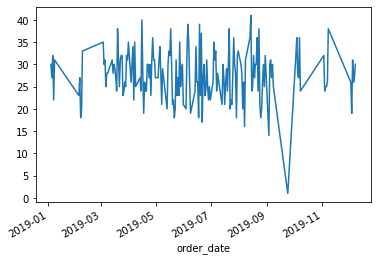

In [8]:
orders_amount_by_date = orders.groupby('order_date')['order_id'].count()
orders_amount_by_date.plot()
print(orders_amount_by_date[orders_amount_by_date == orders_amount_by_date.max()])

### Odp: 14.08.2019

## Ilu klientów skorzystało z kuponu rabatowego w trakcie zakupów?

In [9]:
orders[orders['KUPON'].notnull()]['client_id'].nunique()

998

### Odp: 998

## Ilu klientów zrobiło w analizowanym okresie więcej niż jedno zamówienie?

In [10]:
orders_amount_by_client = orders.groupby('client_id')['order_id'].count()
orders_amount_by_client[1 < orders_amount_by_client].count()

22

### Odp: 22

## Który z produktów cieszył się największym powodzeniem? Ilu klientów kupiło go ze zniżką?

In [11]:
sent 

,order_id,item_id_1,item_id_2,item_id_3
0,314631735,2655227,9051607.0,NaN
1,802224752,1984910,4286301.0,NaN
2,716057036,2669985,1052038.0,NaN
3,125731133,5966397,NaN,NaN
4,12070864,6788106,9643817.0,NaN
...,...,...,...,...
3662,552069972,4738768,684194.0,4169115.0
3663,408612183,8250741,1005647.0,NaN
3664,725171229,152614,NaN,NaN
3665,26224680,1971413,NaN,NaN


In [12]:
sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667 entries, 0 to 3666
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   order_id   3667 non-null   int64  
 1   item_id_1  3667 non-null   int64  
 2   item_id_2  1328 non-null   float64
 3   item_id_3  358 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 114.7 KB


#### Transformacja danych

In [13]:
sent = pd.melt(sent, id_vars=['order_id'])
sent = sent.drop(['variable'], axis=1) 
sent = sent.rename(columns={'value': 'item_id'})
sent = sent.dropna()
sent = sent.astype('int64')
print(sent.info())
print(sent.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 0 to 11000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   order_id  5353 non-null   int64
 1   item_id   5353 non-null   int64
dtypes: int64(2)
memory usage: 125.5 KB
None
    order_id  item_id
0  314631735  2655227
1  802224752  1984910
2  716057036  2669985
3  125731133  5966397
4   12070864  6788106


#### Rozwiązanie

In [14]:
orders_amount_by_item = sent.groupby('item_id')['order_id'].count()
bestseller = orders_amount_by_item[orders_amount_by_item == orders_amount_by_item.max()]
bestseller

item_id
4355722    70
Name: order_id, dtype: int64

In [24]:
bestseller_orders_ids = sent[sent['item_id'] == bestseller.index[0]]['order_id']
bestseller_orders = orders[orders['order_id'].isin(bestseller_orders_ids)]
bestseller_orders[bestseller_orders['KUPON'].notnull()]['client_id'].nunique()

11

### Odp: Największą popularnością cieszył się produkt 4355722. Ze zniżką kupiło go 11 klientów.

## Który produkt był najczęściej kupowany ze zniżką?

In [27]:
orders_with_coupon_ids = orders[orders['KUPON'].notnull()]['order_id']

In [32]:
items_with_coupon = sent[sent['order_id'].isin(orders_with_coupon_ids)]
orders_amount_by_items_with_coupon = items_with_coupon.groupby('item_id')['order_id'].count()
orders_amount_by_items_with_coupon[orders_amount_by_items_with_coupon == orders_amount_by_items_with_coupon.max()]

item_id
1554376    19
Name: order_id, dtype: int64

### Odp: Ze zniżką najczęściej był kupowany produkt 1554376

In [35]:
print(prices.info())
print(prices.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   item_id     110 non-null    int64
 1   base_price  110 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB
None
   item_id  base_price
0  7447126         225
1  2696692         112
2  2883136         192
3  1984910         136
4  2242676         107


## Jaka była końcowa wartość wszystkich zamówień w badanym okresie?

In [46]:
sent_with_base_price = sent.join(prices.set_index('item_id'), on = 'item_id')
sent_orders_with_base_price = sent_with_base_price.join(orders.set_index('order_id'), on='order_id')
sent_orders_with_base_price['KUPON'] = sent_orders_with_base_price['KUPON'].fillna(0)

In [48]:
final_prices = sent_orders_with_base_price['base_price'] * (1 - sent_orders_with_base_price['KUPON'] )

In [50]:
final_prices.sum()

794260.69

### Odp: 794260.69